In [50]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [51]:
df_flickr = pd.read_pickle('../pickles/utseus-shanghai-flickr.pk')

In [52]:
type(df_flickr)

pandas.core.frame.DataFrame

In [53]:
df_flickr.head()

,id,latitude,longitude,owner,accuracy,woeid,year,month,day,title,tags,description,url
0,12786061,31.239682,121.497266,23804952@N00,15,22726052.0,2004,9,25,Needle in the Sky,sky 2004 architecture shanghai pearltower dscp8,"Pearl TV Tower, Shanghai",http://farm1.staticflickr.com/9/12786061_a6b55...
1,21048909,31.234380,121.494541,40264825@N00,16,22726050.0,2005,3,22,Skywards,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048909_3a5c...
2,21048962,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,Bund2,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048962_98b0...
3,21048995,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,RoomWithaView,holga cityscape shanghai hotelrooms,Holga Shanghai Places\n\nCamera: Holga 120N\n,http://farm1.staticflickr.com/15/21048995_8cd6...
4,21049047,31.234380,121.494541,40264825@N00,16,22726050.0,2004,11,30,"Bund, Early Morning (Shanghai)",holga cityscape shanghai,Camera: Holga 120N,http://farm1.staticflickr.com/15/21049047_51f8...


In [54]:
#df_flickr has na value
print(len(df_flickr))
print(len(df_flickr.dropna()))

43404
8967


In [55]:
print(sum(df_flickr.longitude.isna()))
print(sum(df_flickr.latitude.isna()))
print(sum(df_flickr.title.isna()))
print(sum(df_flickr.tags.isna()))
print(sum(df_flickr.description.isna()))

0
0
4226
16147
31320


In [56]:
df_flickr = df_flickr[df_flickr.title.notna()]

In [57]:
gdf_flickr = gpd.GeoDataFrame(df_flickr, geometry = [Point(x,y) for x,y in zip(df_flickr.longitude, df_flickr.latitude)])
gdf_flickr.crs = {'init': 'epsg:4326'} #world projection

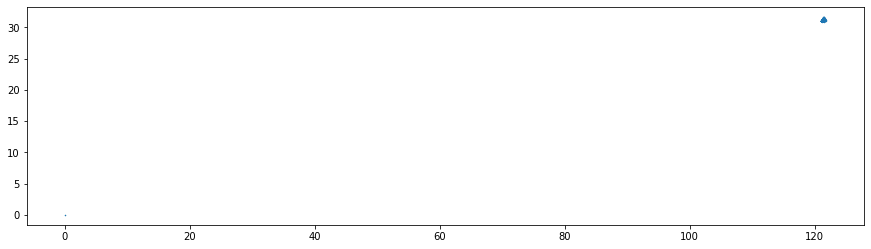

In [58]:
%matplotlib inline
gdf_flickr.plot(markersize=0.01, figsize=(15,10))

In [59]:
time = ManagingTime()
time.displayStartTime()

gdf_flickr = gdf_flickr.loc[gdf_flickr.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-06 11:59:20.687816
Running time: 0:00:07.837913


In [60]:
print(len(gdf_flickr))

39102


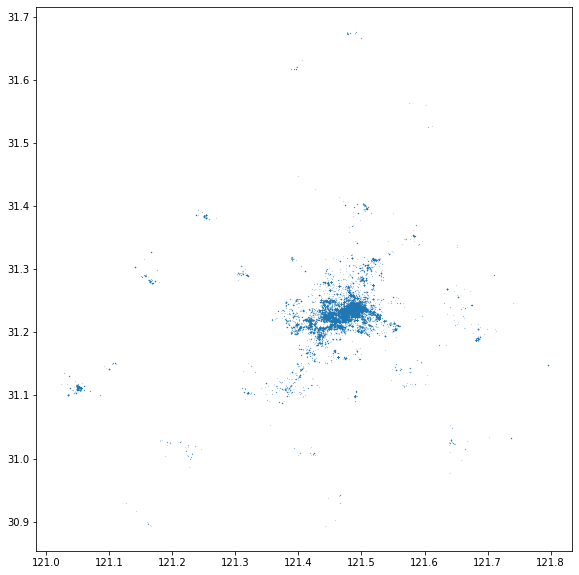

In [61]:
%matplotlib inline
gdf_flickr.plot(markersize=0.01, figsize=(15,10))

In [62]:
#no duplicated rows
gdf_flickr[(gdf_flickr.duplicated(keep = 'first', subset=gdf_flickr.columns.difference(['geometry','id'])))]

,id,latitude,longitude,owner,accuracy,woeid,year,month,day,title,tags,description,url,geometry


In [63]:
print(gdf_flickr.describe())

                 id      latitude     longitude      accuracy         woeid  \
count  3.910200e+04  39102.000000  39102.000000  39102.000000  3.910200e+04   
mean   1.993233e+10     31.227810    121.462800     15.248350  1.429576e+07   
std    5.021671e+09      0.040247      0.078989      1.741551  1.011831e+07   
min    1.278606e+07     30.892913    121.023216      5.000000  2.132535e+06   
25%    1.646238e+10     31.218618    121.453516     16.000000  2.151849e+06   
50%    1.931196e+10     31.230827    121.478468     16.000000  2.272605e+07   
75%    2.402815e+10     31.239846    121.492996     16.000000  2.272605e+07   
max    2.884189e+10     31.676533    121.795978     16.000000  2.272607e+07   

               year         month           day  
count  39102.000000  39102.000000  39102.000000  
mean    2014.432101      6.282697     16.109534  
std        1.965712      3.394789      9.047635  
min     2000.000000      1.000000      1.000000  
25%     2014.000000      3.000000     

In [64]:
gdf_flickr.head()

,id,latitude,longitude,owner,accuracy,woeid,year,month,day,title,tags,description,url,geometry
0,12786061,31.239682,121.497266,23804952@N00,15,22726052.0,2004,9,25,Needle in the Sky,sky 2004 architecture shanghai pearltower dscp8,"Pearl TV Tower, Shanghai",http://farm1.staticflickr.com/9/12786061_a6b55...,POINT (121.497266 31.239682)
1,21048909,31.234380,121.494541,40264825@N00,16,22726050.0,2005,3,22,Skywards,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048909_3a5c...,POINT (121.494541 31.23438)
2,21048962,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,Bund2,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048962_98b0...,POINT (121.494541 31.23438)
3,21048995,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,RoomWithaView,holga cityscape shanghai hotelrooms,Holga Shanghai Places\n\nCamera: Holga 120N\n,http://farm1.staticflickr.com/15/21048995_8cd6...,POINT (121.494541 31.23438)
4,21049047,31.234380,121.494541,40264825@N00,16,22726050.0,2004,11,30,"Bund, Early Morning (Shanghai)",holga cityscape shanghai,Camera: Holga 120N,http://farm1.staticflickr.com/15/21049047_51f8...,POINT (121.494541 31.23438)


In [65]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


gdf_flickr['longitude_m'] = gdf_flickr[['longitude', 'latitude']].apply(getNewLongitude, axis=1)
gdf_flickr['latitude_m'] = gdf_flickr[['longitude', 'latitude']].apply(getNewLatitude, axis=1)

In [66]:
gdf_flickr.head()

,id,latitude,longitude,owner,accuracy,woeid,year,month,day,title,tags,description,url,geometry,longitude_m,latitude_m
0,12786061,31.239682,121.497266,23804952@N00,15,22726052.0,2004,9,25,Needle in the Sky,sky 2004 architecture shanghai pearltower dscp8,"Pearl TV Tower, Shanghai",http://farm1.staticflickr.com/9/12786061_a6b55...,POINT (121.497266 31.239682),-2.851709e+06,4.654065e+06
1,21048909,31.234380,121.494541,40264825@N00,16,22726050.0,2005,3,22,Skywards,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048909_3a5c...,POINT (121.494541 31.23438),-2.851647e+06,4.654461e+06
2,21048962,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,Bund2,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048962_98b0...,POINT (121.494541 31.23438),-2.851647e+06,4.654461e+06
3,21048995,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,RoomWithaView,holga cityscape shanghai hotelrooms,Holga Shanghai Places\n\nCamera: Holga 120N\n,http://farm1.staticflickr.com/15/21048995_8cd6...,POINT (121.494541 31.23438),-2.851647e+06,4.654461e+06
4,21049047,31.234380,121.494541,40264825@N00,16,22726050.0,2004,11,30,"Bund, Early Morning (Shanghai)",holga cityscape shanghai,Camera: Holga 120N,http://farm1.staticflickr.com/15/21049047_51f8...,POINT (121.494541 31.23438),-2.851647e+06,4.654461e+06


In [67]:
gdf_flickr = gdf_flickr[['title','tags','description','longitude', 'latitude','longitude_m', 'latitude_m']]

In [68]:
gdf_flickr.head()

,title,tags,description,longitude,latitude,longitude_m,latitude_m
0,Needle in the Sky,sky 2004 architecture shanghai pearltower dscp8,"Pearl TV Tower, Shanghai",121.497266,31.239682,-2.851709e+06,4.654065e+06
1,Skywards,holga cityscape shanghai,Holga Shanghai Places,121.494541,31.234380,-2.851647e+06,4.654461e+06
2,Bund2,holga cityscape shanghai,Holga Shanghai Places,121.494541,31.234380,-2.851647e+06,4.654461e+06
3,RoomWithaView,holga cityscape shanghai hotelrooms,Holga Shanghai Places\n\nCamera: Holga 120N\n,121.494541,31.234380,-2.851647e+06,4.654461e+06
4,"Bund, Early Morning (Shanghai)",holga cityscape shanghai,Camera: Holga 120N,121.494541,31.234380,-2.851647e+06,4.654461e+06


In [69]:
dico_dirty = ['dirty','soiled','grimy','grubby','filthy','mucky','stained','unwashed','greasy','smeared','smeary',
              'spotted','smudged','cloudy','muddy','dusty','sooty','unclean','sullied','impure','tarnished',
              'polluted','contaminated','defiled','foul','unhygienic','insanitary','unsanitary','cruddy',
              'yucky','icky','manky','gungy','grotty','bogging','befouled','besmirched','begrimed','feculent',
              'soil','stain','muddy','blacken','mess up','spoil','tarnish','taint','mark','spatter','bespatter',
              'smudge','smear','daub','spot','splash','splatter','sully','pollute','foul','defile','befoul',
              'besmirch','begrime']

In [70]:
dico_clean = ['blank','bright','clear','elegant','fresh','graceful','hygienic','immaculate','neat','orderly','pure',
              'simple','spotless','tidy','unblemished','washed','cleansed','laundered','shining','sparkling','speckless',
              'stainless','trim','vanilla','white','delicate','dirtless','faultless','flawless','neat as a button',
              'neat as a pin','sanitary','snowy','spic and span','squeaky','taintless','unpolluted','unsmudged','unsoiled',
              'unspotted','unstained','unsullied','untarnished','well-kept']

In [71]:
gdf_flickr['clean0_dirty1'] = np.nan

In [72]:
def get_dirty(x):
    result = -1
    for value in dico_dirty:
        if x.find(value) > -1:
            result = 1
            break
    for value in dico_clean:
        if x.find(value) > -1:
            if result == -1:
                result = 0
            else:
                result = -1
            break
    return result

In [73]:
gdf_flickr['clean0_dirty1'] = gdf_flickr['title'].apply(get_dirty)

In [74]:
len(gdf_flickr[gdf_flickr.clean0_dirty1 > -1])

251

In [75]:
# 251 points is not enough usable

In [76]:
gdf_flickr = gpd.GeoDataFrame(gdf_flickr, geometry = [Point(x,y) for x,y in zip(gdf_flickr.longitude_m, gdf_flickr.latitude_m)])
gdf_flickr.crs = {'init': 'epsg:4479'} #china metric projection

In [77]:
gdf_flickr.to_pickle('../clean_pickles/flickr.pk')

In [78]:
stop

NameError: name 'stop' is not defined

In [ ]:
gdf_flickr = pd.read_pickle('../clean_pickles/flickr.pk')

In [ ]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [ ]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

In [ ]:
'''
#need 1h18 to run
time = ManagingTime()
time.displayStartTime()

gdf_target['nb_taxi_all'] = 0
gdf_target['taxi_speed_mean'] = np.nan
for index,value in gdf_target.iterrows():
    clear_output()
    time.displayStartTime()
    print(index)
    gdf_temp = gdf_taxi.loc[gdf_taxi.within(value.surface_buffer)]
    gdf_target.nb_taxi_all.loc[index] = len(gdf_temp)
    gdf_target.taxi_speed_mean.loc[index] = gdf_temp.speed.mean()

gdf_target.to_pickle('../clean_pickles/target_taxi_speed.pk')

time.displayEndTime()
time.displayRunningTime() '''

In [ ]:
gdf_target.describe()

In [ ]:
# No taxi found in 14 area.
len(gdf_target[gdf_target.nb_taxi_all == 0])